In [27]:
import torch
import numpy as np
import networkx as nx
import pickle
import os
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import MultipleLocator

In [2]:
dataset= 'squirrel'

In [3]:
z_dir = '../pygcn/z_vis/' + dataset + '/0/'

In [4]:
graph_edges = '../pygcn/new_data/' + dataset + '/out1_graph_edges.txt'
with open(graph_edges, 'r') as f:
    lines = f.readlines()

In [5]:
node_nums ={
    'texas': 183,
    'wisconsin': 251,
    'cornell': 183,
    'film': 7600,
    'squirrel': 5201,
    'chameleon': 2277,
    'cora': 2708,
    'citeseer': 3327,
    'pubmed': 19717
}

node_num = node_nums[dataset]
adj = np.zeros((node_num, node_num))

for i in range(1, len(lines)):
    line = lines[i]
    line = line.rstrip().split('\t')
    adj[int(line[0]), int(line[1])] = 1
    adj[int(line[1]), int(line[0])] = 1


In [6]:
adj

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
G = nx.from_numpy_matrix(adj)

In [8]:
# path_dir = 'hop_pkls/' + dataset + '_path.pkl'

# if os.path.exists(path_dir):
#     with open(path_dir, 'rb') as f:
#         path = pickle.load(f)
# else:
#     path = dict(nx.all_pairs_shortest_path(G))
#     with open(path_dir, 'wb') as f:
#         pickle.dump(path, f)

In [9]:
path_length_dir = 'hop_pkls/' + dataset + '_path_length.pkl'

if os.path.exists(path_length_dir):
    with open(path_length_dir, 'rb') as f:
        path_length = pickle.load(f)
else:
    path_length = dict(nx.all_pairs_shortest_path_length(G))
    with open(path_length_dir, 'wb') as f:
        pickle.dump(path_length, f)



In [10]:
distance = np.zeros((node_num, node_num))
for i in range(node_num):
    for j in range(node_num):
        distance[i][j] = path_length[i][j]

In [11]:
unique, counts = np.unique(distance, return_counts=True)
print(np.asarray((unique, counts)).T)

[[0.000000e+00 5.201000e+03]
 [1.000000e+00 3.967060e+05]
 [2.000000e+00 8.403772e+06]
 [3.000000e+00 9.603496e+06]
 [4.000000e+00 6.092402e+06]
 [5.000000e+00 2.148628e+06]
 [6.000000e+00 3.501540e+05]
 [7.000000e+00 4.443000e+04]
 [8.000000e+00 5.188000e+03]
 [9.000000e+00 4.120000e+02]
 [1.000000e+01 1.200000e+01]]


In [12]:
unique

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [13]:
counts

array([   5201,  396706, 8403772, 9603496, 6092402, 2148628,  350154,
         44430,    5188,     412,      12])

In [14]:
epoch_list = []
for file in os.listdir(z_dir):
    if file != 'label.pt' and file != 'adj.pt':
        # print(file)
        name = file.split('.')[0]
        name = name.split('_')[1]        
        epoch_list.append(int(name))

epoch = max(epoch_list)
print(epoch)

201


In [15]:
z = torch.load(z_dir+'z_' + str(epoch) + '.pt')

In [16]:
z.shape

torch.Size([5201, 5201])

In [17]:
z = z.detach().numpy()

In [18]:
labels = torch.load(z_dir + 'label.pt')

In [19]:
labels.shape

torch.Size([5201])

In [20]:
labels = labels.detach().numpy()

In [21]:
z_pos_sum = [0] * unique.shape[0]
friends_sum = [0] * unique.shape[0]


for i in range(node_num):
    for j in range(node_num):
        if labels[i] == labels[j]:
            friends_sum[int(distance[i][j])] += 1
            if z[i][j] > 0:
                z_pos_sum[int(distance[i][j])] += 1

if friends_sum[-1] == 0:
    z_pos_sum = z_pos_sum[:-1]
    friends_sum = friends_sum[:-1]


print('z_pos_sum', z_pos_sum)
print('friends_sum', friends_sum)

z_pos_sum [5201, 88122, 1338321, 1017227, 530094, 182748, 27986, 3018, 200, 2]
friends_sum [5201, 88122, 1653826, 1974570, 1174346, 431142, 72540, 9278, 1020, 40]


In [22]:
z_pos_sum_log = [np.log2(p) for p in z_pos_sum]
friends_sum_log = [np.log2(f) for f in friends_sum]

z_pos_sum_log = np.around(z_pos_sum_log, 2)
friends_sum_log = np.around(friends_sum_log, 2)

print('z_pos_sum_log', z_pos_sum_log)
print('friends_sum_log', friends_sum_log)

z_pos_sum_log [12.34 16.43 20.35 19.96 19.02 17.48 14.77 11.56  7.64  1.  ]
friends_sum_log [12.34 16.43 20.66 20.91 20.16 18.72 16.15 13.18  9.99  5.32]


In [23]:
counts

array([   5201,  396706, 8403772, 9603496, 6092402, 2148628,  350154,
         44430,    5188,     412,      12])

In [24]:
ratio = [z_pos_sum[i]/counts[i] for i in range(len(z_pos_sum))]
ratio

[1.0,
 0.22213427576089093,
 0.15925241665290302,
 0.10592257236323106,
 0.08700903190564246,
 0.08505334566988795,
 0.07992483307344768,
 0.06792707629979744,
 0.03855050115651504,
 0.0048543689320388345]

In [25]:
len(z_pos_sum)

10

In [30]:
matplotlib.rcParams.update({'font.size': 15})

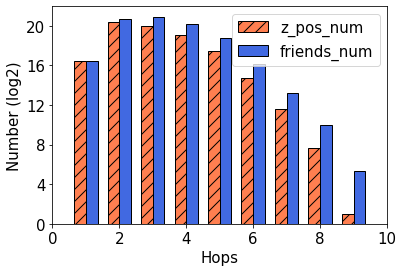

In [32]:
plt.figure()
width = 0.35
plt.xlim(0, len(z_pos_sum))
plt.ylabel('Number (log2)')
plt.xlabel('Hops')
ax = plt.gca()
y_major_locator = MultipleLocator(4)
ax.yaxis.set_major_locator(y_major_locator)
hops = np.arange(1, len(z_pos_sum), 1)
# new_ratio = [r * 100 for r in ratio[1:]]
# plt.plot(hops, new_ratio, marker='*')
hatchs = ["//", "\\"]
plt.bar(hops - width/2, z_pos_sum_log[1:], label='z_pos_num', width=width, hatch='//', edgecolor='black', color='coral')
plt.bar(hops + width/2, friends_sum_log[1:], label='friends_num', width=width, hatch="", edgecolor='black', color='royalblue')
plt.legend(loc='upper right')
plt.savefig('case_study/case_study_{}.pdf'.format(dataset), bbox_inches='tight')
plt.show()